# 3. Preparación dataset

In [1]:
import pandas as pd               #tratamiento dataframes
import numpy as np                #tratamiento arrays
import matplotlib.pyplot as plt   #representación
import seaborn as sns             # representación
import re                         #expresiones regulares
from scipy import stats           # test de hipotesis
import pylab                      # qqplot

## 3.1. Carga y presentación del conjunto de datos / comprobacion basica del dataset

In [2]:
df = pd.read_csv("vehicles.csv",header=0,sep=",")

Vemos una muestra del dataframe para conocer su estructura

In [3]:
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
276730,7315332673,https://newyork.craigslist.org/que/ctd/d/frank...,new york city,https://newyork.craigslist.org,379,2017.0,bmw,4 series,NaN,NaN,...,NaN,other,black,https://images.craigslist.org/00d0d_66CPrAkExa...,2017 BMW 4 Series 440i xDrive Gran Coupe 379 ...,NaN,ny,40.707152,-73.669059,2021-05-01T12:05:22-0400
417031,7316858749,https://greenbay.craigslist.org/ctd/d/green-ba...,green bay,https://greenbay.craigslist.org,28234,2019.0,cadillac,xt5,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00B0B_4mTXBFPTn8...,2019 Cadillac XT5 FWD - Radiant Silver Metalli...,NaN,wi,44.538579,-88.070989,2021-05-04T13:39:35-0500
368037,7307791593,https://corpuschristi.craigslist.org/ctd/d/cor...,corpus christi,https://corpuschristi.craigslist.org,33430,2018.0,chevrolet,tahoe,NaN,8 cylinders,...,full-size,SUV,custom,https://images.craigslist.org/00O0O_9YrwGx3jv7...,SOLD!!! This Chevrolet Tahoe has just been S...,NaN,tx,27.706100,-97.353700,2021-04-16T12:07:54-0500
51200,7310126370,https://reno.craigslist.org/cto/d/carson-city-...,reno / tahoe,https://reno.craigslist.org,5500,2005.0,NaN,scion tc,good,4 cylinders,...,compact,coupe,purple,https://images.craigslist.org/00Z0Z_hdjOnvZHYL...,$5500 -Odometer 155k miles -New iridium spark...,NaN,ca,39.202500,-119.752600,2021-04-20T17:23:19-0700
387613,7312036925,https://vermont.craigslist.org/ctd/d/essex-jun...,vermont,https://vermont.craigslist.org,9999,2010.0,audi,q5 3.2 quattro premium,like new,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/01414_510h4bOz9q...,3.2L_____NEW TIRES____NEW BRAKES___SERVICED AN...,NaN,vt,44.476115,-73.119335,2021-04-24T15:54:50-0400


In [4]:
df.shape

(426880, 26)

Comprobamos que tenemos un total de 426880 observaciones, con 26 columnas que contienen información sobre cada registro. Vamos a pararnos un poco en ver la información que contienen dichas columnas.

## 3.2. Información de las variables

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df[['fuel','odometer','title_status','transmission','VIN','drive']].sample(5)

,fuel,odometer,title_status,transmission,VIN,drive
91153,diesel,112139.0,clean,automatic,1FT7W2BT3FEB92915,4wd
70942,gas,22100.0,clean,other,5J8TC2H59KL035672,NaN
225424,gas,225000.0,clean,automatic,NaN,4wd
367991,gas,43177.0,clean,automatic,NaN,4wd
60034,gas,15096.0,clean,other,5TFRY5F15LX266610,NaN


In [7]:
# valores nulos por columna
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
# clases de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Observamos que hay columnas que no se ajustan a sus correspondientes tipos y que tenemos datos faltantes. Más adelante los adecuaremos

In [9]:
df[["cylinders",'fuel','title_status','size','type','drive']].sample(5)

,cylinders,fuel,title_status,size,type,drive
43171,NaN,gas,clean,NaN,wagon,fwd
33492,8 cylinders,gas,clean,NaN,NaN,rwd
188726,NaN,gas,clean,NaN,NaN,NaN
174906,NaN,gas,clean,NaN,sedan,rwd
322866,6 cylinders,gas,clean,NaN,SUV,4wd


### Descripción de las variables
- **id**: identificador unico del anuncio de la venta del vehículo (var. cuantitativa discreta)
- **url**: enlace del aunicio (string)
- **url_region**: dominio del anuncio (string)
- **region**: región de los EEUU donde se vende el vehículo (variable cualitativa nominal)
- **price**: precio del vehículo en dólares americanos (variable cuantitativa continua)
- **year**: año de matriculacion del hehículo (float)
- **manufacturer**: marca del vehículo
- **model**: modelo
- **condition**: variable categórica que especifica el estado del vehículo según la comprobación realizada en el taller de la empresa vendedora
- **cylinders**: cilindradas del vehículo
- **fuel**: tipo de combustible del vehículo
- **odometer**: millas recorridas por el vehículo
- **title_status**: estado actual del coche (limpio, solo piezas, reconstruido, lien(embargado), perdido, salvage(rescatado?)
- **transmission**: tipo de transmisión (automatica, manual, otra o nan)
- **VIN** (vehicle identification number) 
- **drive** (traccion) rwd (Rear-wheel drive, traccion traseta) fwd (Front-wheel drive) tranccion delantera, 4wd traccion total (4x4)
- **size**: tamaño de coche (variable cualitativa ordinal) 
- **type**:tipo de coche(coupe, sedan, bus, ...)
- **paint_color**:color
- image_url
- **description** 
- **county**: comarca,condado
- **lat** latitud
- **long** longitud
- **posting date**: fecha de publicacion del anuncio

## 3.3. Selección de variables y registros

En primer lugar, veamos si tenemos id repetidos para descartar datos redundantes

In [10]:
df.drop_duplicates(subset='id')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [11]:
# Antes había 426880
len(df["id"].unique())

426880

no tenemos datos repetidos, pasamos a ver qué variables van a considerarse útiles en nuestro problema

### Selección de variables
- region, state (la zona donde se venda el vehículo puede condicionar su precio)
- price: variable objetivo
- year: coches mas nuevos suelen ser mas caros
- manufacturer: la marca es un factor condicionante
- model: Pasa lo mismo que con la marca (a menos fuerza)
- condition: estado del vehiculo
- cilinders: a mayor cilindrada, mayor potencia del coche
- fuel: tipo de combustible condiciona el precio de los mismos.
- odometer: cuanto mas kilometros haya recorrido el coche, menos cuesta
- title_Status: si el coche tiene los papeles en regla es mucho mas caro que si no
- drive: normalmente los coches de traccion trasera suelen ser modelos deportivos y, por ende, más caros. Los coches de tracción completa suelen ser tambien algo más caros que los de tracción delantera.
- transmision: los coches automáticos suelen tener un precio algo más elevado a los manuales. 
- size: como norma general, los coches más frandes suelen ser más caros que los opequeños, pero esto no es siempore así. Hay que tener cuidado cone sta variable.
- type: el tipo de coche condiciona su precio; por ejemplo, los coches deportivos son más caros que las furgonetas
- color: los colores por defecto de los coches (blanco, negro, gris) suelen ser más baratos que los colores específicos
- description: esta variable puede contener información valiosa acerca del resto de variables que no vengan contempladas

borramos el resto de variables

In [12]:
df.drop(['id', 'url','region_url','VIN','image_url','county','lat', 'long','posting_date'],axis=1,inplace=True)

In [13]:
df.shape

(426880, 17)

### Selección de resgistros

Una vez tenemos una idea previa de los datos que tenemos, podemos empezar con el data cleaning. No obstante, recordemos que el objetivo de este proyecto es predecir la elaboración de modelos que nos permitan predecir el precio de un coche de segunda mano de la forma más precisa posible. Si observamos las marcas de las cuales disponemos los datos, nos damos cuenta de que tenemos marcas muy dispares entre sí, lo que se traduce en precios muy dispares. Parece lógico pensar que que una persona interesada en comprar un coche, si bien no tiene una marca predeterminada, sí que tiene una idea de la gama de coche que va a comprar. Dicho esto, construir y entrenar modelos utilizando datos tan dispares podría afectar a la precisión de nuestros modelos, por lo que vamos a centrarnos en elaborar un modelo que nos. sirva para predecir el precio de coches de gama media, eliminando de nuestra muestra marcas de coches económicas y marcas excesivamente caras. Siguiendo este criterio, los modelos realizados podrían haberse adaptado a una gama de coches distinta, optimizando resultados para este tipo de vehículos. Sería interesante y se propone como ampliación de este proyecto la elaboración de estos modelos.

Veamos las marcas de coches que disponemos

In [14]:
df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [15]:
len(df.manufacturer.unique())-1

42

In [16]:
df.groupby("manufacturer")["price"].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
manufacturer,,,,,
acura,5978,19842.869522,18399.5,0,139999
alfa-romeo,897,28237.348941,29590.0,0,62950
aston-martin,24,53494.541667,46997.5,0,179888
audi,7573,23574.849993,23551.0,0,160000
bmw,14699,26740.261446,16495.0,0,113456789
buick,5501,36784.954736,11399.0,0,123456789
cadillac,6953,19439.520926,15995.0,0,195000
chevrolet,55064,115676.101645,14389.0,0,3009548743
chrysler,6031,10442.946609,7499.0,0,655000


Observando esta lista nos damos cuenta de que ya a priori nos indica que hay fallos en los datos (coches a 0 euros y coches que superar un precio de 100 millones de euros. Considerando los conocimientos que tengo sobre coches, las búsquedas que he realizado en orden de documentación y los valores estadísticos básicos que aparecen en la tabla (especialmente la media), las marcas que he calificado como gama media son las siguientes:
- alfa romeo 
- audi
- bmw
- toyota
- cadillac
- gmc
- honda
- jaguar
- jeep
- lexus 
- mercedes-benz
- mini
- subaru
- mitsubishi

a raiz de esto, vamos a quedarnos con los datos cuyas marcas pertenezcan a la lista descrita

In [17]:
lista_gamamedia = ["alfa-romeo","audi","bmw","toyota","cadillac","gmc","honda","jaguar","jeep","lexus","mercedes-benz","mini","subaru",'mitsubishi']

In [18]:
datos = df[df["manufacturer"].isin(lista_gamamedia)].drop("manufacturer",axis=1)

In [19]:
datos.shape

(158518, 16)

In [20]:
datos.columns

Index(['region', 'price', 'year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'description', 'state'],
      dtype='object')

##### Partimos por lo tanto de un dataset de 158518 observaciones  con 16 variables para cada una

# 4. EDA

In [21]:
datos = datos.reset_index(drop=True)

## 4.1. Cambio de tipos

In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158518 entries, 0 to 158517
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        158518 non-null  object 
 1   price         158518 non-null  int64  
 2   year          158518 non-null  float64
 3   model         157303 non-null  object 
 4   condition     96391 non-null   object 
 5   cylinders     92652 non-null   object 
 6   fuel          157528 non-null  object 
 7   odometer      156877 non-null  float64
 8   title_status  155374 non-null  object 
 9   transmission  157711 non-null  object 
 10  drive         108201 non-null  object 
 11  size          44628 non-null   object 
 12  type          129309 non-null  object 
 13  paint_color   112229 non-null  object 
 14  description   158517 non-null  object 
 15  state         158518 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 19.4+ MB


In [23]:
datos["price"]=datos["price"].astype(float, copy=False, errors='raise')
datos["year"]=datos["year"].astype(int, copy=False, errors='raise')

In [24]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158518 entries, 0 to 158517
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        158518 non-null  object 
 1   price         158518 non-null  float64
 2   year          158518 non-null  int64  
 3   model         157303 non-null  object 
 4   condition     96391 non-null   object 
 5   cylinders     92652 non-null   object 
 6   fuel          157528 non-null  object 
 7   odometer      156877 non-null  float64
 8   title_status  155374 non-null  object 
 9   transmission  157711 non-null  object 
 10  drive         108201 non-null  object 
 11  size          44628 non-null   object 
 12  type          129309 non-null  object 
 13  paint_color   112229 non-null  object 
 14  description   158517 non-null  object 
 15  state         158518 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 19.4+ MB


## 4.2. Recuperación de datos implícitos

In [25]:
datos.isna().sum()

region               0
price                0
year                 0
model             1215
condition        62127
cylinders        65866
fuel               990
odometer          1641
title_status      3144
transmission       807
drive            50317
size            113890
type             29209
paint_color      46289
description          1
state                0
dtype: int64

Recordemos que tanto model como description no son variables que vayamos a utilizar explícitamente, sino una posible fuente de datos que no se recogen en el resto de columnas.

In [26]:
datos["model"].sample(5)

121624                   fj cruiser
19997                     box truck
94388          tacoma access cab sr
95907                       odyssey
112401    e-pace p250 sport utility
Name: model, dtype: object

In [27]:
datos["description"].sample(5)

94955     2016 JAGUAR XF PRESTIGE     Offered by: Fast T...
88189     UPPER ECHELON RIGHT HERE!!! 2014 GMC SIERRA DE...
6789      ➔ Want to see more pictures?Paste this link to...
105924    Carvana is the safer way to buy a car During t...
155967    This Toyota Camry can be yours today!For the s...
Name: description, dtype: object

### Función relleno

Vamos a crear listas de posibles palabras que puedan darnos información sobre los vehículos que no tenemos.


In [28]:
def relleno(x,y,lista):
    if (x!=x) | (x is None):
        if y==y:
            for i in lista:
                if (y.lower().find(i)!=-1):
                    x = str(i)
    return x

In [29]:
def rellenoN(x,y,lista):
    if (x!=x) | (x is None):
        for i in lista:
            a = re.findall(i,y)
            if len(a)!=0:
                x = float(''.join(filter(str.isdigit,a[0])))
    return x

## 4.2.1. Variables cualitativas con nulos

### 4.2.1.1.  `condition`: condición/estado del vehiculo

In [30]:
datos['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

In [31]:
listaCondition = ['excellent','new','like new','like-new','very good',
                  'good','great',
                  'fair','reasobable conditions','reasonable terms',
                  'poor','bad',
                  'salvage']

In [32]:
datos["condition"].isna().sum()

62127

In [33]:
datos['condition'] = datos.apply(lambda x: relleno(x.condition,x.model,listaCondition), axis=1)
datos['condition'] = datos.apply(lambda x: relleno(x.condition,x.description,listaCondition), axis=1)

In [34]:
datos["condition"].isna().sum()

14785

### 4.2.1.2. `cylinders`: cilindradas del motor

In [35]:
datos['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '3 cylinders',
       'other', '5 cylinders', '12 cylinders', '10 cylinders'],
      dtype=object)

In [36]:
listaCylinders = ['2cc','3cc','4cc','5cc','6cc','7cc','8cc','9cc','10cc','11cc','12cc',
    '2 cc','3 cc','4 cc','5 cc','6 cc','7 cc','8 cc','9 cc','10 cc','11 cc','12 cc',
    '2 cylinders','3 cylinders','4 cylinders','5 cylinders','6 cylinders','7 cylinders',
    '8 cylinders','9 cylinders','10 cylinders','11 cylinders','12 cylinders',
    '2cylinders','3cylinders','4cylinders','5cylinders','6cylinders','7cylinders',
    '8cylinders','9cylinders','10cylinders','11cylinders','12cylinders'
    '2 cylinder','3 cylinder','4 cylinder','5 cylinder','6 cylinder','7 cylinder',
    '8 cylinder','9 cylinder','10 cylinder','11 cylinder','12 cylinder',
    '2cylinder','3cylinder','4cylinder','5cylinder','6cylinder','7cylinder',
    '8cylinder','9cylinder','10cylinder','11cylinder','12cylinder']

In [37]:
datos["cylinders"].isna().sum()

65866

In [38]:
datos['cylinders'] = datos.apply(lambda x: relleno(x.cylinders,x.model,listaCylinders), axis=1)
datos['cylinders'] = datos.apply(lambda x: relleno(x.cylinders,x.description,listaCylinders), axis=1)

In [39]:
datos["cylinders"].isna().sum()

57225

### 4.2.1.3. `fuel`: tipo de combustible

In [40]:
datos['fuel'].unique()

array(['gas', 'other', 'diesel', nan, 'hybrid', 'electric'], dtype=object)

In [41]:
listaFuel = ['fuel','gas','gasoline','petrol','diesel', 'hybrid', 'electric','cng']

In [42]:
datos["fuel"].isna().sum()

990

In [43]:
datos['fuel'] = datos.apply(lambda x: relleno(x.fuel,x.model,listaFuel), axis=1)
datos['fuel'] = datos.apply(lambda x: relleno(x.fuel,x.description,listaFuel), axis=1)

In [44]:
datos["fuel"].isna().sum()

184

### 4.2.1.4. `title_status`: estado oficial del vehículo

In [45]:
datos['title_status'].unique()

array(['clean', 'lien', nan, 'salvage', 'rebuilt', 'missing',
       'parts only'], dtype=object)

In [46]:
listaStatus = ['clean','clear','rebuilt','reconstructed','bonded',
               'lien','missing','salvage','parts only',"embargoed"]

In [47]:
datos["title_status"].isna().sum()

3144

In [48]:
datos['title_status'] = datos.apply(lambda x: relleno(x.title_status,x.model,listaStatus), axis=1)
datos['title_status'] = datos.apply(lambda x: relleno(x.title_status,x.description,listaStatus), axis=1)

In [49]:
datos["title_status"].isna().sum()

1820

### 4.2.1.5. `transmission`: tipo de transmisión del vehículo

In [50]:
datos['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [51]:
listaTransmission = ['automatic','manual']

In [52]:
datos["transmission"].isna().sum()

807

In [53]:
datos['transmission'] = datos.apply(lambda x: relleno(x.transmission,x.model,listaTransmission), axis=1)
datos['transmission'] = datos.apply(lambda x: relleno(x.transmission,x.description,listaTransmission), axis=1)

In [54]:
datos["transmission"].isna().sum()

436

### 4.2.1.6. `drive`: tipo de tracción

In [55]:
datos['drive'].unique()

array([nan, '4wd', 'fwd', 'rwd'], dtype=object)

In [56]:
listaDrive = ['awd','all-wheel drive','all wheel drive',
              '4wd','four-wheel drive','four-wheel drive',
              'fwd','front-wheel drive','front wheel drive',
              'rwd','rear-wheel drive','rear wheel drive']

In [57]:
datos["drive"].isna().sum()

50317

In [58]:
datos['drive'] = datos.apply(lambda x: relleno(x.drive,x.model,listaDrive), axis=1)
datos['drive'] = datos.apply(lambda x: relleno(x.drive,x.description,listaDrive), axis=1)

In [59]:
datos["drive"].isna().sum()

22945

### 4.2.1.7. `size`: tamaño del vehículo

In [60]:
datos["size"].sample(5)

59499          NaN
92859          NaN
81812          NaN
29165    full-size
12902          NaN
Name: size, dtype: object

In [61]:
datos['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [62]:
datos['size'].dtype

dtype('O')

In [63]:
listaSize = ['mini-size', 'mini size','mini car',
             'small-size', 'small size','small-car','sub-compact',
             'mid-sized', 'mid size', 'mid sized', 'mid car','compact',
             'large-size', 'large size', 'large car', 'full-size']

In [64]:
datos['size'].isna().sum()

113890

In [65]:
#datos['size2'] = datos.apply(lambda x: relleno(x.size,x.model,listaSize), axis=1)
#datos['size2'] = datos.apply(lambda x: relleno(x.size,x.description,listaSize), axis=1)

In [66]:
#datos = datos.drop('size2',axis=1)

In [67]:
datos['size'].isna().sum()

113890

In [68]:
datos['size'].dtype

dtype('O')

In [69]:
#datos['size2'].isna().sum()

In [70]:
#datos['size2'].dtype

### 4.2.1.8. `paint_color`: color del vehículo

In [71]:
datos['paint_color'].unique()

array(['white', 'red', 'black', 'grey', nan, 'silver', 'blue', 'yellow',
       'orange', 'green', 'custom', 'brown', 'purple'], dtype=object)

In [72]:
listaColor = ['white', 'black', 'grey',
              'silver','gold'
              'red',   'blue', 'brown', 'yellow',
              'green','custom','orange', 'purple','pink']

In [73]:
datos['paint_color'].isna().sum()

46289

In [74]:
datos['paint_color'] = datos.apply(lambda x: relleno(x.paint_color,x.model,listaColor), axis=1)
datos['paint_color'] = datos.apply(lambda x: relleno(x.paint_color,x.description,listaColor), axis=1)

In [75]:
datos['paint_color'].isna().sum()

16453

### 4.2.1.9. `type`: tipo de vehículo

In [76]:
datos['type'].unique()

array(['pickup', 'truck', nan, 'other', 'SUV', 'hatchback', 'mini-van',
       'coupe', 'sedan', 'offroad', 'convertible', 'van', 'wagon', 'bus'],
      dtype=object)

In [77]:
listaType = ['roadster','road-ster','road ster','sportcar','sports car', 'sports-car','sportscars',
    'super car','supercar','super-car',"sport car",'sport-car',
    'vans','van',"minivan", 'mini-van','mini van','campervan', 'camper-van','camper van',
    'cabriolet','convertible', 'limousine',
    'cuv', 'crossover', 'crosover', 'cross over', 'cross-over',
    'hatchback','hatch-back','hatch back',
    'sedan','coupe', 'wagon','bus','pickup', 'truck','suv','micro',
    'offroad','off-road','jeep']

In [78]:
datos['type'].isna().sum()

29209

In [79]:
datos['type'] = datos.apply(lambda x: relleno(x.type,x.model,listaType), axis=1)
datos['type'] = datos.apply(lambda x: relleno(x.type,x.description,listaType), axis=1)

In [80]:
datos['type'].isna().sum()

12996

## 4.2.2. Variables cuantitativas con nulos

### 4.2.2.1. `odometer`: millas recorridas

In [81]:
listaOdometer = ['\d+mi','\d+ mi','\d+,\d+mi','\d+,\d+ mi']

In [82]:
datos['odometer'].isna().sum()

1641

In [83]:
datos['odometer'] = datos.apply(lambda x: rellenoN(x.odometer,x.model,listaOdometer), axis=1)
datos['odometer'] = datos.apply(lambda x: rellenoN(x.odometer,x.description,listaOdometer), axis=1)

In [84]:
datos['odometer'].isna().sum()

909

In [85]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158518 entries, 0 to 158517
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        158518 non-null  object 
 1   price         158518 non-null  float64
 2   year          158518 non-null  int64  
 3   model         157303 non-null  object 
 4   condition     143733 non-null  object 
 5   cylinders     101293 non-null  object 
 6   fuel          158334 non-null  object 
 7   odometer      157609 non-null  float64
 8   title_status  156698 non-null  object 
 9   transmission  158082 non-null  object 
 10  drive         135573 non-null  object 
 11  size          44628 non-null   object 
 12  type          145522 non-null  object 
 13  paint_color   142065 non-null  object 
 14  description   158517 non-null  object 
 15  state         158518 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 19.4+ MB


Comprobamos si tras todos estos rellenos hemos obtenido algún dato duplicado

In [86]:
datos.drop_duplicates()

,region,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,auburn,33590.0,2014,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al
1,auburn,30990.0,2017,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al
2,auburn,27990.0,2012,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,Carvana is the safer way to buy a car During t...,al
3,auburn,35000.0,2019,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,NaN,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al
4,auburn,4500.0,1992,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,4wd,NaN,jeep,NaN,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158513,wyoming,30990.0,2018,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,rwd,NaN,other,white,Carvana is the safer way to buy a car During t...,wy
158514,wyoming,33590.0,2018,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,NaN,sedan,white,Carvana is the safer way to buy a car During t...,wy
158515,wyoming,34990.0,2020,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,awd,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy
158516,wyoming,28990.0,2018,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy


No hay datos duplicados, eliminamos las columnas modelo y descripcion

In [87]:
datos = datos.drop(["description","model"],axis=1)

In [88]:
datos.shape

(158518, 14)

## 4.3. Análisis univariable de las variables

In [89]:
datos.columns

Index(['region', 'price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

## 4.3.1. Variable objetivo

In [90]:
# Estadísticos básicos
datos["price"].describe()

count    1.585180e+05
mean     1.201469e+05
std      1.766732e+07
min      0.000000e+00
25%      6.295000e+03
50%      1.450000e+04
75%      2.659000e+04
max      3.736929e+09
Name: price, dtype: float64

In [91]:
datos.shape

(158518, 14)

In [93]:
datos=datos[datos["price"]>0]
datos.shape

(147205, 14)

In [94]:
datos=datos[datos["price"]<=100000]

In [95]:
datos.shape

(147049, 14)

In [96]:
datos=datos[datos["price"]>100]
datos.shape

(145719, 14)

Volvemos a calcular estadísticos básicos de la variable objetivo:

In [97]:
datos["price"].describe()

count    145719.000000
mean      18802.206397
std       13554.539480
min         101.000000
25%        7950.000000
50%       15990.000000
75%       27590.000000
max      100000.000000
Name: price, dtype: float64

Seguimos apreciando valores anómalos, pero esta vez no son valores irreales. Para tener una idea más clara, representemos su histograma y un diagrama de cajas y bigotes.

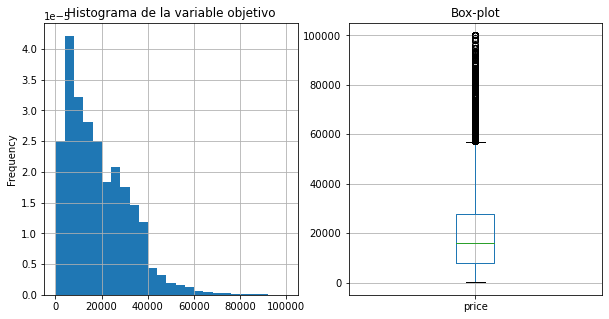

In [98]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['price'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'price')
plt.show()

In [99]:
stats.shapiro(datos['price'].values)


/Users/davidmoreno/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9234700798988342, pvalue=0.0)

In [100]:
stats.kstest(datos['price'].values, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

((array([-4.42794638, -4.23267965, -4.12659532, ...,  4.12659532,
          4.23267965,  4.42794638]),
  array([   101.,    101.,    101., ..., 100000., 100000., 100000.])),
 (13025.641875625046, 18802.206397244012, 0.9609535415840592))

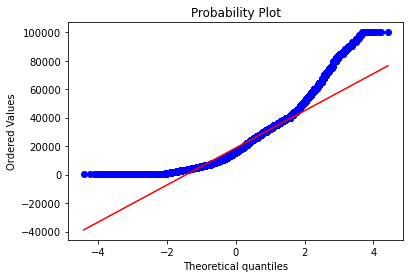

In [101]:
import pylab
stats.probplot(datos['price'].values,dist='norm',plot=pylab)

In [102]:
Q1 = datos['price'].quantile(0.25)
Q3 = datos['price'].quantile(0.75)
RI = Q3 - Q1
a = Q1 - 1.5*RI
b = Q3 + 1.5*RI
print((a,b))

(-21510.0, 57050.0)


In [103]:
datos = datos[datos['price']>=a]
datos = datos[datos['price']<=b]
datos.shape

(143770, 14)

In [104]:
datos = datos.reset_index(drop=True)

Ahora que hemos eliminado los valores considerados outliers, volvamos a calcular los estadísticos básicos y representemos la distribución de la misma.

In [105]:
datos["price"].describe()

count    143770.000000
mean      18131.891563
std       12301.723187
min         101.000000
25%        7900.000000
50%       15899.000000
75%       26990.000000
max       57029.000000
Name: price, dtype: float64

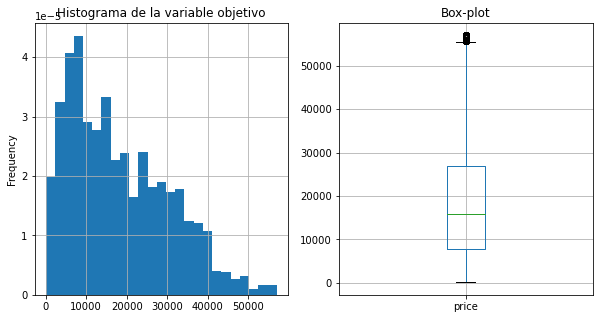

In [106]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['price'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'price')
plt.show()

## 4.3.2. Variables explicativas cualitativas

### 4.3.2.1. `size`

In [107]:
datos.shape

(143770, 14)

In [108]:
datos['size'].isna().sum()

104331

In [109]:
round(datos['size'].isna().sum()*100/datos.shape[0],2)

72.57

In [110]:
datos = datos.drop('size',axis=1)
datos.shape

(143770, 13)

### 4.3.2.2. `fuel`

In [111]:
datos["fuel"].isna().sum()

178

al ser una cantidad muy baja, eliminamos los valores nulos

In [112]:
datos = datos[datos["fuel"]==datos["fuel"]]
datos = datos.reset_index(drop=True)

In [113]:
datos.shape

(143592, 13)

In [114]:
datos["fuel"].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'fuel', 'electric', 'gasoline'],
      dtype=object)

In [115]:
datos["fuel"]=datos["fuel"].apply(lambda x : x.replace("gasoline","gas"))
datos["fuel"]=datos["fuel"].apply(lambda x : x.replace("fuel","gas"))

In [116]:
datos["fuel"].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [117]:
# Tabla frecuencias
freqFuel = pd.DataFrame(datos['fuel'].value_counts())
freqFuel["FreqRel"] = round(freqFuel['fuel']/freqFuel["fuel"].sum(),2)
freqFuel

,fuel,FreqRel
gas,125544,0.87
other,11192,0.08
hybrid,3310,0.02
diesel,3260,0.02
electric,286,0.00


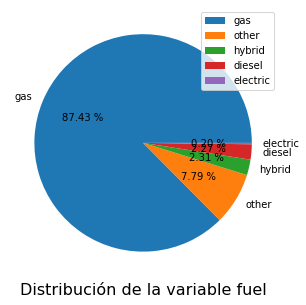

In [118]:
plt.figure(figsize=(5,5))
plt.pie(freqFuel["fuel"], labels=freqFuel.index, autopct="%0.2f %%")
plt.xlabel("Distribución de la variable fuel",fontsize=16)
plt.legend()
plt.show()

### 4.3.2.3. `transmission`

In [119]:
datos["transmission"].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [120]:
datos["transmission"].isna().sum()

388

In [121]:
datos.shape

(143592, 13)

In [122]:
datos = datos[datos['transmission']==datos['transmission']]
datos = datos.reset_index(drop=True)

In [123]:
datos.shape

(143204, 13)

In [124]:
# Tabla frecuencias
freqTrans = pd.DataFrame(datos['transmission'].value_counts())
freqTrans["FreqRel"] = round(freqTrans['transmission']/freqTrans["transmission"].sum(),2)
freqTrans

,transmission,FreqRel
automatic,108761,0.76
other,25858,0.18
manual,8585,0.06


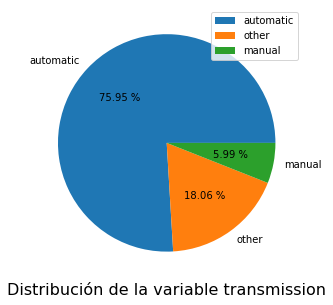

In [125]:
plt.figure(figsize=(5,5))
plt.pie(freqTrans["transmission"], labels=freqTrans.index, autopct="%0.2f %%")
plt.xlabel("Distribución de la variable transmission",fontsize=16)
plt.legend()
plt.show()

### 4.3.2.4. `title_status`

In [126]:
datos['title_status'].unique()

array(['clean', 'lien', 'clear', 'salvage', 'rebuilt', nan, 'missing',
       'parts only'], dtype=object)

In [127]:
datos['title_status'].isna().sum()

1726

In [128]:
datos.shape

(143204, 13)

Recordemos que nuestro objetivo es crear una herramienta que nos sirva como elemento predictor de los precios del mercado de segunda mano a la hora de comprar un coche de gama media. Dicho esto, parece lógico eliminar la categoría `parts only`. Una vez hecho esto, vemos que tenemos 1053 elementos nulos.Si bien tenemos una categoría claramente predominante, el hecho de equivocarnos y pertener a otra de ellas podría variar en exceso el precio del vehículo. Dado que no podemos saber a priori a qué categoria pertenece y que es una cantidad despreciable dada la cantidad de datos que tenemos, se ha optado por su eliminación en lugar de la imputación.

In [129]:
datos = datos[datos["title_status"]==datos['title_status']]
datos = datos[datos['title_status']!='parts only']

In [130]:
freqTitle = pd.DataFrame(datos['title_status'].value_counts())
freqTitle["FreqRel"] = round(freqTitle['title_status']/freqTitle["title_status"].sum(),2)
freqTitle

,title_status,FreqRel
clean,135953,0.96
rebuilt,2581,0.02
salvage,1595,0.01
clear,635,0.00
lien,530,0.00
missing,138,0.00


In [131]:
datos.shape

(141432, 13)

In [132]:
datos = datos.reset_index(drop=True)

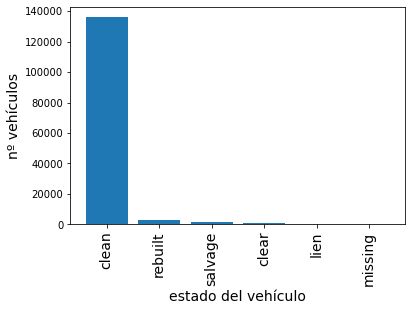

In [133]:
plt.figure(figsize=(6,4))
plt.bar(freqTitle.index, freqTitle["title_status"].values)
plt.xlabel('estado del vehículo',fontsize=14)
plt.ylabel ('nº vehículos',fontsize=14)
plt.xticks(freqTitle.index, rotation=90,fontsize=14)
plt.show()

### 4.3.2.5. `type`

In [134]:
datos["type"].unique()

array(['pickup', 'truck', 'jeep', 'other', 'SUV', 'hatchback', 'mini-van',
       'coupe', 'sedan', 'offroad', 'convertible', 'suv', 'off-road',
       'cuv', nan, 'van', 'bus', 'wagon', 'crossover', 'mini van',
       'minivan', 'micro', 'sports car', 'limousine', 'camper van',
       'roadster', 'sport car', 'hatch back', 'cabriolet', 'campervan',
       'crosover'], dtype=object)

In [135]:
datos['type'].isna().sum()

11968

In [136]:
datos = datos[datos["type"]==datos["type"]]
datos = datos.reset_index(drop=True)

datos["type"]=datos["type"].apply(lambda x : x.replace("-",""))
datos["type"]=datos["type"].apply(lambda x : x.replace(" ",""))
datos["type"]=datos["type"].apply(lambda x : x.replace("suv","SUV"))
datos["type"]=datos["type"].apply(lambda x : x.replace("vans","van"))
datos["type"]=datos["type"].apply(lambda x : x.replace("campervan","van"))
datos["type"]=datos["type"].apply(lambda x : x.replace("cabriolet","convertible"))
datos["type"]=datos["type"].apply(lambda x : x.replace("sportscar","roadster"))
datos["type"]=datos["type"].apply(lambda x : x.replace("sportcar","roadster"))
datos["type"]=datos["type"].apply(lambda x : x.replace("jeep","offroad"))
datos["type"]=datos["type"].apply(lambda x : x.replace("supercar","roadster"))
datos["type"]=datos["type"].apply(lambda x : x.replace("cuv","crossover"))
datos["type"]=datos["type"].apply(lambda x : x.replace("crosover","crossover"))

In [137]:
datos["type"].unique()

array(['pickup', 'truck', 'offroad', 'other', 'SUV', 'hatchback',
       'minivan', 'coupe', 'sedan', 'convertible', 'crossover', 'van',
       'bus', 'wagon', 'micro', 'roadster', 'limousine'], dtype=object)

In [138]:
datos['type'].isna().sum()

0

In [139]:
datos = datos[datos["type"]!='limousine']
datos = datos[datos["type"]!='bus']

In [140]:
freqType = pd.DataFrame(datos['type'].value_counts())
freqType["FreqRel"] = round(freqType['type']/freqType["type"].sum(),2)
freqType

,type,FreqRel
SUV,36670,0.28
sedan,35038,0.27
pickup,10068,0.08
other,8255,0.06
hatchback,7468,0.06
truck,7212,0.06
coupe,6249,0.05
wagon,5054,0.04
offroad,4484,0.03
convertible,3179,0.02


### 4.3.2.6. `condition`

In [141]:
datos['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'great', 'bad',
       nan, 'salvage', 'poor', 'like-new'], dtype=object)

In [142]:
datos['condition'].isna().sum()

10377

In [143]:
datos["condition"]=datos["condition"].fillna('unknown') # tengo los nan guardados como unknown

datos["condition"]=datos["condition"].apply(lambda x : x.replace("like new","excellent"))
datos["condition"]=datos["condition"].apply(lambda x : x.replace("like-new","excellent"))
datos["condition"]=datos["condition"].apply(lambda x : x.replace("new","excellent"))

datos["condition"]=datos["condition"].apply(lambda x : x.replace("great","good"))

datos["condition"]=datos["condition"].apply(lambda x : x.replace("bad","poor"))

In [144]:
datos['condition'].unique()

array(['good', 'excellent', 'fair', 'poor', 'unknown', 'salvage'],
      dtype=object)

In [145]:
freqCond = pd.DataFrame(datos['condition'].value_counts())
freqCond["FreqRel"] = round(freqCond['condition']/freqCond["condition"].sum(),2)
freqCond

,condition,FreqRel
good,52884,0.41
excellent,43322,0.34
poor,18061,0.14
unknown,10377,0.08
fair,3360,0.03
salvage,757,0.01


In [146]:
datos = datos[datos["condition"]!="unknown"]
datos.shape

(118384, 13)

In [147]:
datos = datos.reset_index(drop=True)

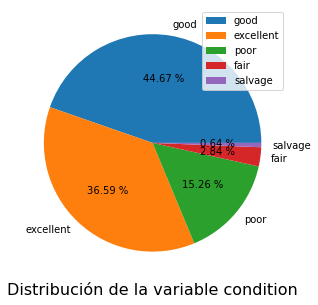

In [148]:
freqCond = pd.DataFrame(datos['condition'].value_counts())
freqCond["FreqRel"] = round(freqCond['condition']/freqCond["condition"].sum(),2)
plt.figure(figsize=(5,5))
plt.pie(freqCond["condition"], labels=freqCond.index, autopct="%0.2f %%")
plt.xlabel("Distribución de la variable condition",fontsize=16)
plt.legend()
plt.show()

### 4.3.2.7. `drive`

In [149]:
datos["drive"].unique()

array([nan, '4wd', 'fwd', 'awd', 'rwd', 'all wheel drive',
       'rear wheel drive', 'front wheel drive', 'front-wheel drive',
       'all-wheel drive', 'rear-wheel drive', 'four-wheel drive'],
      dtype=object)

In [150]:
datos["drive"].isna().sum()

12411

Dato que la tracción `awd` es prácticamente idéntica a `4wd` (los neuvos coches tienen tracción 4wd, pero en esencia es 4wd) vamos unir esta categoría, de forma que la distribución de esta variable queda de la siguiente manera

In [151]:
# Tabla frecuencias
datos = datos[datos["drive"]==datos["drive"]]

datos = datos.reset_index(drop=True)

datos["drive"]=datos["drive"].apply(lambda x : x.replace('rear wheel drive',"rwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('rear-wheel drive',"rwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('front wheel drive',"fwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('front-wheel drive',"fwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('four wheel drive',"4wd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('four-wheel drive',"4wd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('all wheel drive',"fwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace('all-wheel drive',"fwd"))
datos["drive"]=datos["drive"].apply(lambda x : x.replace("awd","4wd"))

freqDrive = pd.DataFrame(datos['drive'].value_counts())
freqDrive["FreqRel"] = round(freqDrive['drive']/freqDrive["drive"].sum(),2)
freqDrive

,drive,FreqRel
4wd,57863,0.55
fwd,31895,0.30
rwd,16215,0.15


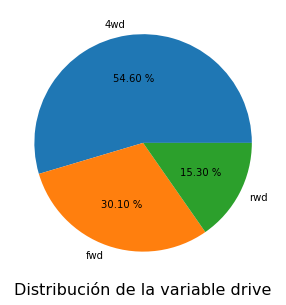

In [152]:
freqDrive = pd.DataFrame(datos['drive'].value_counts())
freqDrive["FreqRel"] = round(freqDrive['drive']/freqDrive["drive"].sum(),2)
plt.figure(figsize=(5,5))
plt.pie(freqDrive["drive"], labels=freqDrive.index, autopct="%0.2f %%")
plt.xlabel("Distribución de la variable drive",fontsize=16)
plt.show()

### 4.3.2.8. `paint_color`

In [153]:
datos["paint_color"].unique()

array(['red', 'black', 'grey', nan, 'silver', 'custom', 'white', 'blue',
       'yellow', 'green', 'brown', 'orange', 'purple', 'pink'],
      dtype=object)

In [154]:
datos["paint_color"].value_counts()

black     21165
white     18224
silver    14995
blue      13532
custom    11261
grey       8013
red        7678
green      2904
brown      2126
orange      839
yellow      464
purple      181
pink         13
Name: paint_color, dtype: int64

In [155]:
# Tabla frecuencias
freqColor = pd.DataFrame(datos['paint_color'].value_counts())
freqColor["FreqRel"] = round(freqColor['paint_color']/freqColor["paint_color"].sum(),2)
freqColor

,paint_color,FreqRel
black,21165,0.21
white,18224,0.18
silver,14995,0.15
blue,13532,0.13
custom,11261,0.11
grey,8013,0.08
red,7678,0.08
green,2904,0.03
brown,2126,0.02
orange,839,0.01


¿Cómo tratamos los nulos?

In [156]:
datos["paint_color"].isna().sum()

4578

Se puede observar que los colores más básicos son predominantes, pero no tenemos un dominante claro. Por este motivo, y al tener bastantes datos nulos,hemos decidido crear una nueva categoría en el que introduciremos a los elementos nulos.

In [157]:
datos["paint_color"] =datos["paint_color"].fillna("unknown")

In [158]:
datos["paint_color"].isna().sum()

0

In [159]:
datos.shape

(105973, 13)

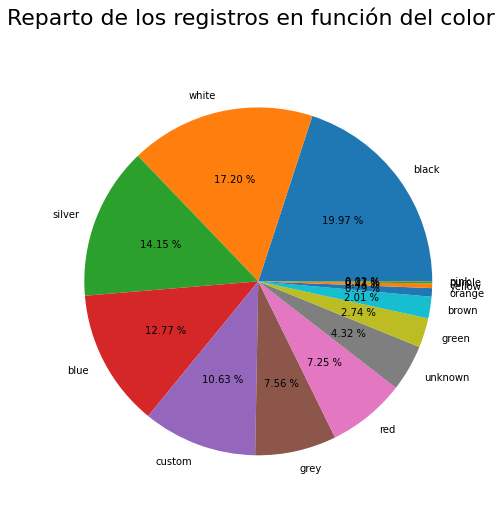

In [160]:
freqColor = pd.DataFrame(datos['paint_color'].value_counts())
freqColor["FreqRel"] = round(freqColor['paint_color']/freqColor["paint_color"].sum(),2)
plt.figure(figsize=(8,8)).suptitle("Reparto de los registros en función del color",fontsize=22)
plt.pie(freqColor["paint_color"], labels=freqColor.index, autopct="%0.2f %%")
plt.show()

### 4.3.2.9. `cylinders`

In [161]:
datos.shape

(105973, 13)

In [162]:
datos["cylinders"].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '4 cylinder',
       '3 cylinders', '5 cylinders', '8 cylinder', '6 cylinder',
       '3cylinder', '2cylinder', '6cylinder', '12 cylinders', 'other',
       '10cylinder', '4cc', '5cc', '7cc', '8cc', '9cc', '6cc',
       '5cylinder', '3 cylinder', '3cc', '4 cc', '4cylinder',
       '10 cylinders', '10cc', '2cc', '11cylinder', '7cylinder',
       '12cylinder', '8cylinder', '11cc', '5 cc', '9cylinder',
       '5 cylinder', '9 cylinder', '10 cylinder', '7 cylinder',
       '11 cylinder', '2 cylinders'], dtype=object)

In [163]:
datos["cylinders"].isna().sum()

31065

In [164]:
print("El porcentaje de nulos de esta variable es del " + str(round(100*datos["cylinders"].isna().sum()/datos.shape[0],2)) + "%")

El porcentaje de nulos de esta variable es del 29.31%


In [165]:
datos["cylinders"]=datos["cylinders"].fillna('unknown')
datos["cylinders"]=datos["cylinders"].apply(lambda x : x.replace("s","").replace(" ","").replace("cylinder","cc"))

In [166]:
datos["cylinders"].unique()

array(['8cc', '6cc', 'unknown', '4cc', '3cc', '5cc', '2cc', '12cc',
       'other', '10cc', '7cc', '9cc', '11cc'], dtype=object)

In [167]:
df[df['cylinders']=='other'].sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
97825,heartland florida,10900,2005.0,harley-davidson,flhrsi,NaN,other,NaN,3514.0,clean,other,rwd,NaN,NaN,yellow,"2005 *Harley-Davidson* *FLHRSI* - $10,900Call...",fl
379088,mcallen / edinburg,3500,2009.0,NaN,todos marcas,like new,other,gas,150000.0,clean,automatic,NaN,NaN,NaN,NaN,"Llámame ,,,,,,9.5,6 5,4.0 3,0.3,7,,,,,,",tx
34861,los angeles,12875,2017.0,ford,escape se,NaN,other,gas,108490.0,clean,automatic,NaN,NaN,NaN,NaN,2017 Ford Escape SE * EASY FINANCING! O.A.D. ...,ca
53082,sacramento,1200,2007.0,NaN,Ricardo,like new,other,gas,37000.0,clean,automatic,NaN,compact,NaN,custom,Selling my 2007 Ricardo gas scooter. With 37.6...,ca
406904,olympic peninsula,49999,2018.0,subaru,wrx,NaN,other,gas,22515.0,clean,manual,4wd,NaN,sedan,blue,Joydrive: 253-201-0804 https://joydrive.com/...,wa
241923,raleigh / durham / CH,600,1999.0,honda,accord,salvage,other,gas,225000.0,missing,other,NaN,NaN,NaN,NaN,serving wake county and surrounding title or n...,nc
579,birmingham,500,2021.0,NaN,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,NaN,full-size,bus,green,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WIT...,al
135224,pullman / moscow,3500,2004.0,ford,2004 f350 super duty,good,other,diesel,200000.0,clean,automatic,4wd,full-size,truck,white,"2004 F350 Super Duty Powerstroke, Lariat/XL/XL...",id
256049,north jersey,22250,2019.0,nissan,leaf sv plus hatchback 4d,excellent,other,electric,16450.0,clean,automatic,fwd,NaN,hatchback,white,2019 Nissan LEAF SV Plus Hatchback 4 Door. 215...,nj
390400,fredericksburg,8997,2013.0,toyota,prius,excellent,other,gas,112975.0,clean,automatic,fwd,mid-size,hatchback,purple,Super clean Toyota Prius special edition. leat...,va


In [168]:
datos["cylinders"]=datos["cylinders"].apply(lambda x : x.replace("other","unknown"))

In [169]:
# Tabla frecuencias
freqCC = pd.DataFrame(datos['cylinders'].value_counts())
freqCC["FreqRel"] = round(freqCC['cylinders']/freqCC["cylinders"].sum(),2)
freqCC

,cylinders,FreqRel
6cc,31538,0.30
unknown,31158,0.29
4cc,28208,0.27
8cc,13929,0.13
3cc,340,0.00
5cc,234,0.00
2cc,206,0.00
10cc,114,0.00
12cc,85,0.00
7cc,78,0.00


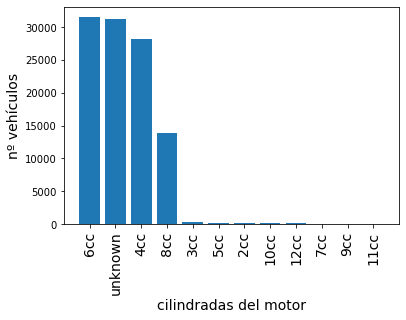

In [170]:
freqCC = pd.DataFrame(datos['cylinders'].value_counts())
freqCC["FreqRel"] = round(freqCC['cylinders']/freqCC["cylinders"].sum(),2)
plt.figure(figsize=(6,4))
plt.bar(freqCC.index, freqCC["cylinders"].values)
plt.xlabel('cilindradas del motor',fontsize=14)
plt.ylabel ('nº vehículos',fontsize=14)
plt.xticks(freqCC.index, rotation=90,fontsize=14)
plt.show()

### 4.3.2.10. `state`

In [171]:
datos["state"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [172]:
datos['state'].isna().sum()

0

In [173]:
freqState = pd.DataFrame(datos['state'].value_counts())
freqState["FreqRel"] = round(freqState['state']/freqState["state"].sum(),2)
freqState.T

,ca,fl,ny,tx,or,oh,nc,pa,mi,wa,...,hi,la,ut,wv,ms,sd,ne,de,wy,nd
state,13524.00,6839.00,5436.00,4782.00,4163.00,3948.00,3731.00,3578.00,3326.00,3241.00,...,620.00,620.00,287.0,265.0,234.0,222.0,177.0,166.0,149.0,79.0
FreqRel,0.13,0.06,0.05,0.05,0.04,0.04,0.04,0.03,0.03,0.03,...,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
#plt.figure(figsize=(8,8))
#plt.pie(freqState["state"], labels=freqState.index)#, autopct="%0.2f %%")
#plt.xlabel("Reparto de los registros en función del estado",fontsize=16)
#plt.show()

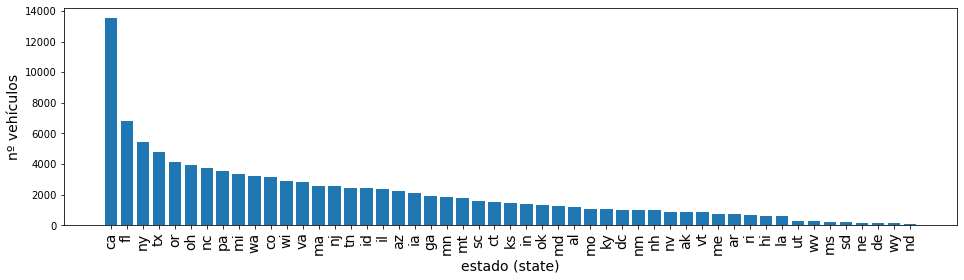

In [175]:
plt.figure(figsize=(16,4))
plt.bar(freqState.index, freqState["state"].values)
plt.xlabel('estado (state)',fontsize=14)
plt.ylabel ('nº vehículos',fontsize=14)
plt.xticks(freqState.index, rotation=90,fontsize=14)
plt.show()

###  4.3.2.11. `region`
La región, al igual que la variable `state`,nos proporciona onformación sobre la ubicación de los coches en venta. 
Esta variable no obtiene nulos, y no otorga información útil tal y como está definida, así que se tratará en la siguiente escción, realizando el análisis univariable correspondiente

Sin embargo, esta es más difusa que la anterior, ya que en cada estado hay muchas regiones, pueblos y ciudades, lo que provoca que haya demasiadas modalidades y muchas de ellas tengan pocas observaciones o incluso ser única. Dicho esto, vamos a utilizar esta variable para obtener información que sí que podría ser útil, y se trata de si esta región o ciudad puede calificarse como un nucleo pequeño o intermedio, un núcleo de población grande o un núcleo cosmopolita o de población muy grande. Tiene sentido agrupar de esta forma ya que puede servirnos para estudiar y marcar las diferencias existentes entre el precio de un coche en grandes ciudaes y en núcleos más sencillos, lo que a priori tiene sentido plantearse.

## 2.3.3. Variables explicativas cuantitativas

### `year`

In [176]:
datos['year'].sample(5)

54104    2008
50392    2008
68601    2017
9355     1996
76624    2012
Name: year, dtype: int64

Ya están en el tipo correcto,

In [177]:
datos.shape

(105973, 13)

In [178]:
datos['year'].count()

105973

No hay nulos.

Calculemos sus estadísticos básicos

In [179]:
datos["year"].describe()

count    105973.000000
mean       2012.118870
std           6.720393
min        1929.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

Observándolos, parece que el salto entre los cuartiles e incluso el máximo son similares. Si embargo, si observamos el mínimo vemos valores fuera de lo normal. Volvemos a hacer incapié en que el objetivo de este estudio es elaborar una herramienta de predicción para coches de segunda mano de gama media utilizables, es decir, para un uso normal, dejando a un lado las piezas de exposición o coleccionista.
Por este motivo, vamos a descartar coches que superen los 50 años de antigüedad, es decir, coches con variable `year`< 1972


In [180]:
datos = datos[datos["year"]>=1972]
datos.shape

(105766, 13)

Representemos el histograma y boxplot de la variable para hacernos una idea de cómo se distribuyeç

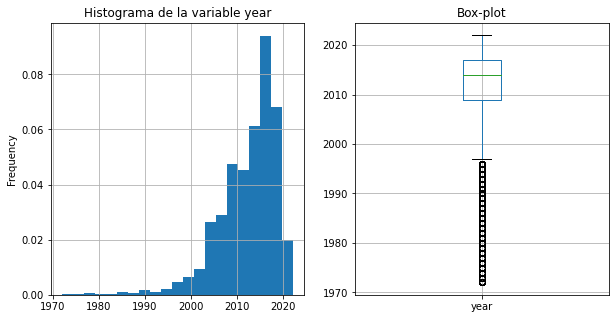

In [181]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable year')
datos['year'].plot.hist(bins=21, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'year')
plt.show()

In [182]:
stats.shapiro(datos['year'].values)

/Users/davidmoreno/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8677486777305603, pvalue=0.0)

((array([-4.35830872, -4.16006713, -4.0522611 , ...,  4.0522611 ,
          4.16006713,  4.35830872]),
  array([1972, 1972, 1972, ..., 2022, 2022, 2022])),
 (5.93862206943449, 2012.2192197870772, 0.9395353841349081))

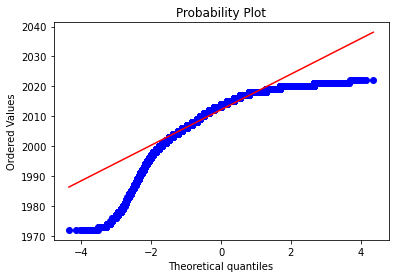

In [183]:
stats.probplot(datos['year'].values,dist='norm',plot=pylab)

In [184]:
stats.kstest(datos['year'].values, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [185]:
Q1 = datos['year'].quantile(0.25)
Q3 = datos['year'].quantile(0.75)
RI = Q3 - Q1
a = Q1 - 1.5*RI
b = Q3 + 1.5*RI
print((a,b))

(1997.0, 2029.0)


In [186]:
datos = datos[datos['year']>=a]
datos = datos[datos['year']<=b]
datos = datos.reset_index(drop = True)
datos.shape

(103404, 13)

In [187]:
datos["year"].describe()

count    103404.000000
mean       2012.744584
std           5.252764
min        1997.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

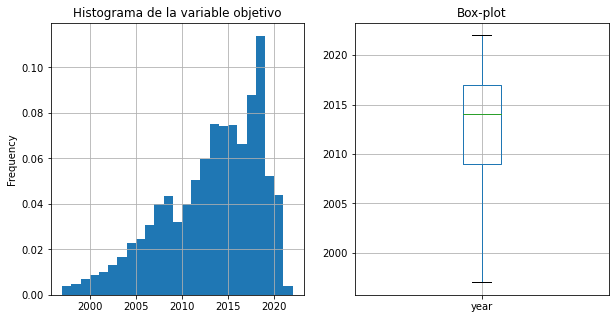

In [188]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['year'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'year')
plt.show()

### `odometer`


In [189]:
datos['odometer'].isna().sum()

354

In [190]:
datos['odometer'].sample(5)

48005    146000.0
35209    183697.0
84176     72555.0
97511     36408.0
95264         NaN
Name: odometer, dtype: float64

In [191]:
datos = datos[datos['odometer']==datos['odometer']]
datos['odometer'].isna().sum()

0

In [192]:
datos.shape

(103050, 13)

In [193]:
datos = datos.reset_index(drop = True)

In [194]:
datos["odometer"].describe()

count    1.030500e+05
mean     8.917857e+04
std      9.379644e+04
min      0.000000e+00
25%      3.520000e+04
50%      7.994250e+04
75%      1.296998e+05
max      9.999999e+06
Name: odometer, dtype: float64

In [195]:
# filtramos los autos que tengas mas de un millón de millas ()
datos = datos[datos['odometer']<=800000]
datos.shape

(103015, 13)

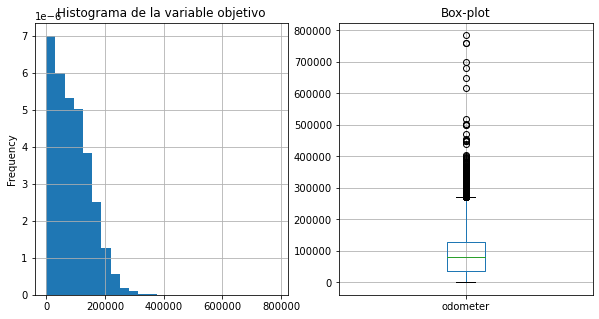

In [196]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['odometer'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'odometer')
plt.show()

((array([-4.35253621, -4.15404401, -4.04609273, ...,  4.04609273,
          4.15404401,  4.35253621]),
  array([     0.,      0.,      0., ..., 760000., 760505., 784320.])),
 (59814.581952938905, 88280.12634082418, 0.9721607947810872))

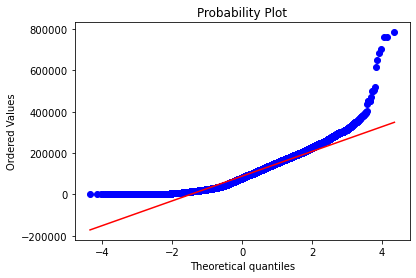

In [197]:
stats.probplot(datos['odometer'].values,dist='norm',plot=pylab)

In [198]:
stats.shapiro(datos['odometer'].values)

/Users/davidmoreno/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9451445937156677, pvalue=0.0)

In [199]:
stats.kstest(datos['odometer'].values, stats.norm.cdf)

KstestResult(statistic=0.9970464241811635, pvalue=0.0)

In [200]:
Q1 = datos['odometer'].quantile(0.25)
Q3 = datos['odometer'].quantile(0.75)
RI = Q3 - Q1
a = Q1 - 1.5*RI
b = Q3 + 1.5*RI
print((a,b))

(-106484.0, 271340.0)


In [201]:
datos = datos[datos['odometer']>=a]
datos = datos[datos['odometer']<=b]
datos = datos.reset_index(drop = True)
datos.shape

(102401, 13)

In [202]:
datos['odometer'].describe()

count    102401.000000
mean      86962.508726
std       59146.041910
min           0.000000
25%       35000.000000
50%       79393.000000
75%      128574.000000
max      271323.000000
Name: odometer, dtype: float64

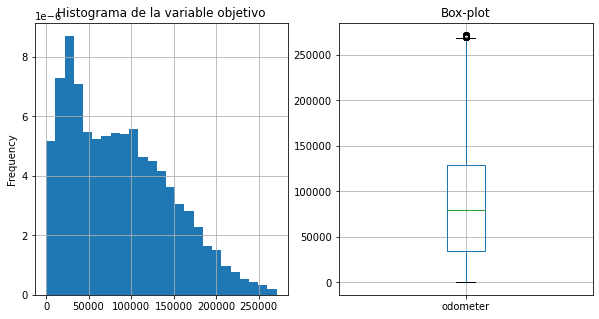

In [203]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['odometer'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'odometer')
plt.show()

## 4.4. Ingeniería de características

En esta sección nos dedicaremos a sacar el máximo provecho de la información que disponemos, transformando algunas de nuestras variables para que las características finales representen de la mejor forma posible propiedades que nos sirvan para describir la variable objetivo y elaborar nuestros modelos

In [204]:
#datos.isna().sum()
datos.shape

(102401, 13)

### 4.4.1. `price` -> `price_k` 

In [205]:
datos['price'].max()-datos['price'].min()

56928.0

In [206]:
datos['price_k'] = datos['price']/1000;

In [207]:
datos[['price','price_k']].sample(10)

,price,price_k
71704,17989.0,17.989
15304,5200.0,5.200
63015,3500.0,3.500
50070,6000.0,6.000
45081,33990.0,33.990
88904,5500.0,5.500
37590,10000.0,10.000
29192,4950.0,4.950
34864,10995.0,10.995
2718,30590.0,30.590


In [208]:
datos = datos.drop('price',axis=1)
datos['price_k'].describe()

count    102401.000000
mean         19.702622
std          12.336134
min           0.101000
25%           8.997000
50%          17.990000
75%          28.989000
max          57.029000
Name: price_k, dtype: float64

### 4.4.2. `year` -> `age`


In [209]:
datos['age']=datos['year'].apply(lambda x: 2022-x)

In [210]:
datos.head(5)

,region,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price_k,age
0,auburn,2017,good,8cc,gas,41124.0,clean,other,4wd,pickup,red,al,30.99,5
1,auburn,2012,good,8cc,gas,68696.0,clean,other,4wd,pickup,black,al,27.99,10
2,auburn,2019,excellent,6cc,gas,43000.0,clean,automatic,4wd,truck,grey,al,35.00,3
3,auburn,2017,good,6cc,gas,30041.0,clean,other,4wd,other,silver,al,32.99,5
4,auburn,2014,good,unknown,other,17805.0,clean,other,4wd,pickup,red,al,27.99,8


In [211]:
datos = datos.drop("year",axis=1)

Comprobemos ahora si tenemos datos esperables

In [212]:
datos["age"].describe()

count    102401.000000
mean          9.196922
std           5.213075
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          25.000000
Name: age, dtype: float64

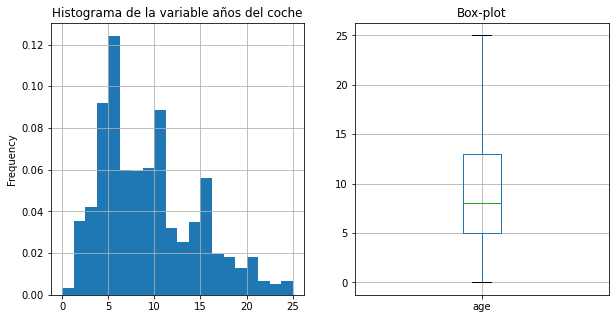

In [213]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable años del coche')
datos['age'].plot.hist(bins=20, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'age')
plt.show()

In [214]:
datos = datos.reset_index(drop = True)

### 4.4.3.  `odometer` -> `odometer_km_k`

In [215]:
datos['odometer_k']=datos['odometer']/1000
#.apply(lambda x: round((1.60934*x)/1000,3))
datos[['odometer','odometer_k']].sample(5)

,odometer,odometer_k
85768,79.0,0.079
5357,5277.0,5.277
3500,62676.0,62.676
22826,55010.0,55.010
34477,30851.0,30.851


In [216]:
datos = datos.drop('odometer',axis=1)
datos["odometer_k"].describe()

count    102401.000000
mean         86.962509
std          59.146042
min           0.000000
25%          35.000000
50%          79.393000
75%         128.574000
max         271.323000
Name: odometer_k, dtype: float64

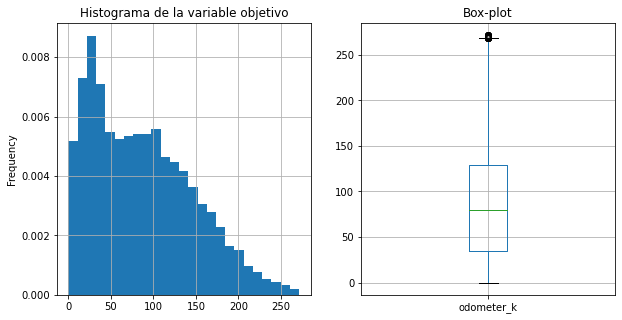

In [217]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.title('Histograma de la variable objetivo')
datos['odometer_k'].plot.hist(bins=25, density=1, grid = True)

plt.subplot(1,2,2)
plt.title('Box-plot')
datos.boxplot(column = 'odometer_k')
plt.show()

###  4.4.4. `region` -> `dim_reg`

In [218]:
listaReg = datos["region"].unique().tolist()
listaReg.sort()
listaReg

['SF bay area',
 'abilene',
 'akron / canton',
 'albany',
 'albuquerque',
 'altoona-johnstown',
 'amarillo',
 'ames',
 'anchorage / mat-su',
 'ann arbor',
 'annapolis',
 'appleton-oshkosh-FDL',
 'asheville',
 'ashtabula',
 'athens',
 'atlanta',
 'auburn',
 'augusta',
 'austin',
 'bakersfield',
 'baltimore',
 'baton rouge',
 'battle creek',
 'beaumont / port arthur',
 'bellingham',
 'bemidji',
 'bend',
 'billings',
 'binghamton',
 'birmingham',
 'bismarck',
 'bloomington',
 'bloomington-normal',
 'boise',
 'boone',
 'boston',
 'boulder',
 'bowling green',
 'bozeman',
 'brainerd',
 'brownsville',
 'brunswick',
 'buffalo',
 'butte',
 'cape cod / islands',
 'catskills',
 'cedar rapids',
 'central NJ',
 'central louisiana',
 'central michigan',
 'champaign urbana',
 'charleston',
 'charlotte',
 'charlottesville',
 'chattanooga',
 'chautauqua',
 'chicago',
 'chico',
 'chillicothe',
 'cincinnati',
 'clarksville',
 'cleveland',
 'clovis / portales',
 'college station',
 'colorado springs',
 'c

In [219]:
regionXL = ['new york city','los angeles','chicago','houston','phoenix','san antonio','philadelphia','san diego',
        'dallas / fort worth','san jose','austin','charlotte','fort worth','san francisco','columbus','jacksonville',
        'indianapolis'] # +800k
regionL = ['denver','seattle-tacoma','washington, DC','el paso','boston','nashville','oklahoma city',
        'portland','memphis','las vegas','louisville','detroit metro','baltimore','milwaukee','albuquerque',
        'fresno / madera','tucson','sacramento','mesa','raleigh / durham / CH','atlanta','colorado springs', 
        'kansas city','kansas city, MO', 'long beach','omaha / council bluffs','miami','virginia beach','oakland',
        'minneapolis / st paul','arlington','tulsa','wichita','wichita falls','cleveland','bakersfield','new orleans',
        'honolulu', 'anaheim','tampa bay area','aurora','santa ana','st louis', 'st louis, MO','pittsburgh',
        'corpus christi','riverside','cincinnati','lexington','anchorage / mat-su','stockton','toledo', 'st paul',
        'newark','greensboro','buffalo','plano','lincoln','henderson','fort wayne'] # (200k,800k)
##### he incluido sin que aparezcan:
# san jose, fort worth, san francisco, mesa, long beach,miami,virginia beach,oakland,arlington,honolulu,anaheim
# aurora,santa ana,riverside,st paul, newark,plano,henderson
##### hay repetidos:
# kansas city,wichita,st louis
def dim_reg(x):
    if x in regionXL:
        y = 'XL'
    elif x in regionL:
        y = 'L'
    else: y = 'M / S'
    return y

In [220]:
datos["dim_region"] = datos["region"].apply(dim_reg)

In [221]:
datos.sample(5)

,region,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state,price_k,age,odometer_k,dim_region
2759,phoenix,good,unknown,other,clean,other,rwd,sedan,red,az,29.990,3,8.404,XL
23138,"washington, DC",excellent,6cc,gas,clean,automatic,fwd,minivan,silver,dc,10.500,11,116.123,L
72791,columbus,good,unknown,gas,clean,other,4wd,other,black,oh,35.990,4,8.490,XL
14768,SF bay area,good,unknown,other,clean,other,fwd,hatchback,silver,ca,21.590,3,12.055,M / S
96819,kennewick-pasco-richland,poor,8cc,gas,clean,automatic,4wd,pickup,grey,wa,56.698,3,13.421,M / S


In [222]:
datos = datos.drop("region",axis=1)

In [223]:
datos.shape

(102401, 13)

Veamos su tabla de frecuencias y representemos dicha tabla en un diagrama de sectores

In [224]:
freqReg = pd.DataFrame(datos['dim_region'].value_counts())
freqReg["FreqRel"] = round(freqReg['dim_region']/freqReg["dim_region"].sum(),2)
freqReg

,dim_region,FreqRel
M / S,66658,0.65
L,25794,0.25
XL,9949,0.10


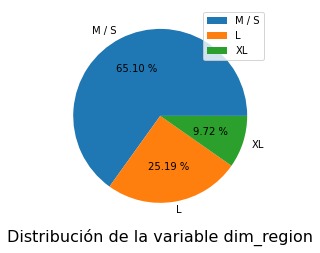

In [225]:
plt.figure(figsize=(4,4))
plt.pie(freqReg["dim_region"], labels=freqReg.index, autopct="%0.2f %%")
plt.xlabel("Distribución de la variable dim_region",fontsize=16)
plt.legend()
plt.show()

### 4.4.5. `condition` -> `condition_num`

La variable `condition` nos muestra una escala que indica el grado de buen estado en el que se encuentra el coche.
Dicha variable es una variable cualitativa, que consta de las siguientes modalidades:
- `excellent`: estado del coche excelente
- `good`: coche en buen estado
- `fair`: estado del coche "justo", no está en mal estado, pero no llega a estar en buenas condiciones
- `poor`: mal estado o pobre, necesita cambiar cosas como las ruedas, los frenos..
- `salvage`: estado del coche malo.


In [226]:
datos['condition'].unique()

array(['good', 'excellent', 'fair', 'poor', 'salvage'], dtype=object)

In [227]:
datos.shape

(102401, 13)

In [228]:
def cond_to_num(x):
    if x=='excellent':
        y=5
    elif x =='good':
        y=4
    elif x=='fair':
        y=3
    elif x=='poor':
        y=2
    else:
        y=1
    return y

In [229]:
datos['condition_num'] = datos["condition"].apply(cond_to_num)
datos[['condition','condition_num']].sample(5)
datos = datos.drop('condition',axis=1)

### 4.4.6. `cylinders` -> `cc`

In [230]:
datos['cylinders'].unique()

array(['8cc', '6cc', 'unknown', '4cc', '5cc', '3cc', '2cc', '12cc',
       '10cc', '7cc', '9cc', '11cc'], dtype=object)

In [231]:
datosCC = datos[datos['cylinders']!='unknown']
datosCC['cc'] = datosCC['cylinders'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
datosCC[['cylinders','cc']].sample(20)
datosCC.describe()

<ipython-input-231-070ecd28d653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosCC['cc'] = datosCC['cylinders'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


,price_k,age,odometer_k,condition_num,cc
count,71679.000000,71679.000000,71679.000000,71679.000000,71679.000000
mean,17.898449,10.096639,97.361531,4.113478,5.588778
std,12.372690,5.294367,58.835411,1.058535,1.494555
min,0.101000,0.000000,0.000000,1.000000,2.000000
25%,7.900000,6.000000,47.460000,4.000000,4.000000
50%,14.995000,9.000000,93.000000,4.000000,6.000000
75%,26.895000,14.000000,139.000000,5.000000,6.000000
max,57.029000,25.000000,271.323000,5.000000,12.000000


Vemos como la mediana es 6, y está bastante próxima a la media. Imputamos por lo tanto con 6 nuestros valores desconocidos.

In [232]:
datos["cylinders"]=datos["cylinders"].apply(lambda x : x.replace("unknown","6cc"))
datos['cc'] = datos['cylinders'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
datos = datos.drop('cylinders',axis=1)

In [233]:
datos.columns

Index(['fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state', 'price_k', 'age', 'odometer_k', 'dim_region', 'condition_num',
       'cc'],
      dtype='object')

In [234]:
datos.shape

(102401, 13)

In [235]:
# Reordenamos
datos = datos[['price_k','age', 'odometer_k',
        'title_status','condition_num',
        'cc','type','fuel','transmission', 'drive',
        'paint_color', 'state','dim_region']]

## 4.5. Análisis multivariable

### 4.5.1. Relación entre variable cuantitativas

Comenzamos realizando una matriz de correlación para las variables cuantitativas, con el objetivo de ver la relación lineal existente entre ellas.

In [236]:
datos.corr()

,price_k,age,odometer_k,condition_num,cc
price_k,1.000000,-0.679332,-0.656077,-0.123967,0.303005
age,-0.679332,1.000000,0.742817,0.154804,0.033786
odometer_k,-0.656077,0.742817,1.000000,0.113511,-0.012092
condition_num,-0.123967,0.154804,0.113511,1.000000,-0.015608
cc,0.303005,0.033786,-0.012092,-0.015608,1.000000


Dibujamos el valor absoluto de las correlaciones para identificar a simple vista las variables más colineales.

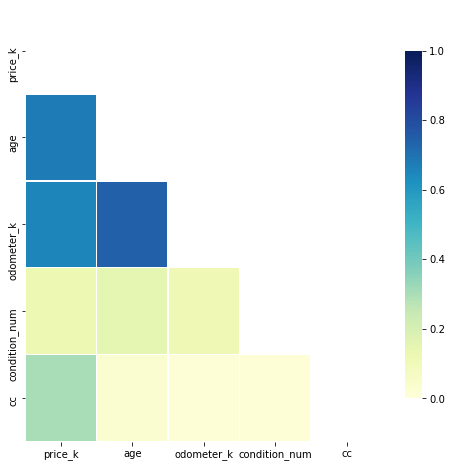

In [237]:
# Compute the correlation matrix
corr = np.abs(datos.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Para confirmar estas suposiciones que hemos realizado sobre las variables numéricas, así como para buscar relaciones que no sean lineales, vamos a realizar gráficos de dispersión para cada par de variables.

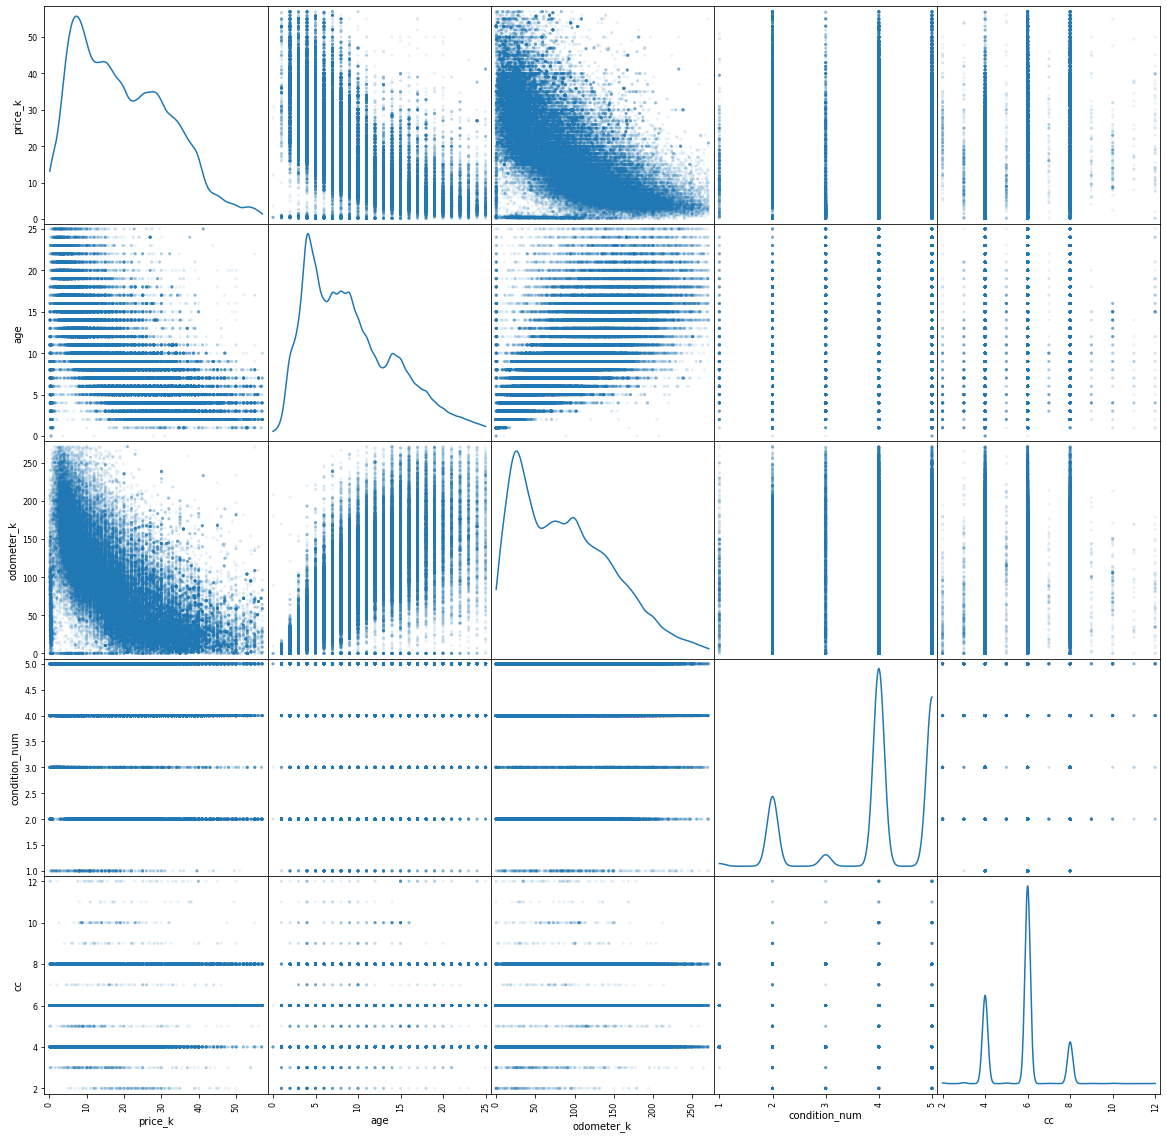

In [238]:
pd.plotting.scatter_matrix(datos, alpha=0.1, figsize=(20, 20), diagonal = 'kde')
plt.show()

En cuanto a las variables transformadas a continuas, `cc` u `condition_num`, puede ser interesante analizar la distribución de de la variable objetivo en función de sus posibles valores

In [239]:
print(datos["condition_num"].unique())
print(datos["cc"].unique())

[4 5 3 2 1]
[ 8  6  4  5  3  2 12 10  7  9 11]


Veamos en primer ligar si la condición en la que se encuentran los vehículos condicionan sus precios.

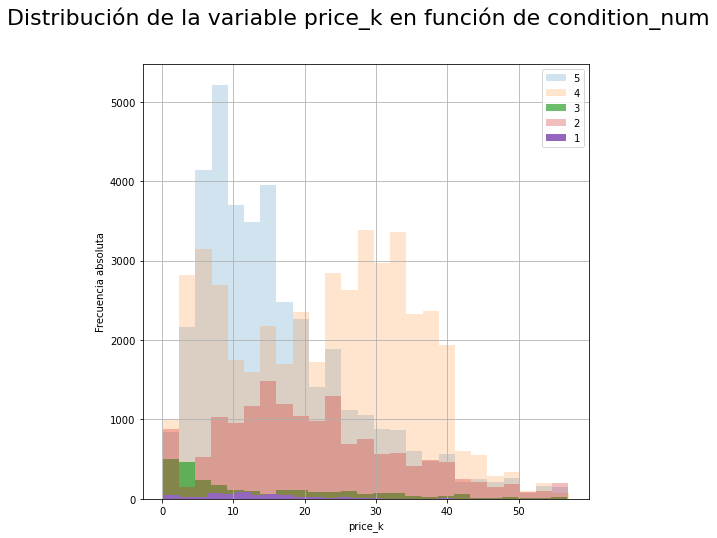

In [240]:
cond1    = datos[datos["condition_num"]==1]
cond2    = datos[datos["condition_num"]==2]
cond3    = datos[datos["condition_num"]==3]
cond4    = datos[datos["condition_num"]==4]
cond5    = datos[datos["condition_num"]==5]
# Histogramas según especie
plt.figure(figsize=(8,8)).suptitle("Distribución de la variable price_k en función de condition_num",fontsize=22)
plt.hist(cond5['price_k'].values,bins=25,alpha=0.2,label="5")
plt.hist(cond4['price_k'].values,bins=25,alpha=0.2,label="4")
plt.hist(cond3['price_k'].values,bins=25,alpha=0.7,label="3")
plt.hist(cond2['price_k'].values,bins=25,alpha=0.3,label="2")
plt.hist(cond1['price_k'].values,bins=25,alpha=1,label="1")
plt.xlabel('price_k')
plt.ylabel('Frecuencia absoluta')
plt.legend()
plt.grid(which='major')
plt.show()

Veamos ahora si la cilindrada del motor condiciona el precio

<ipython-input-241-33a49b398b06>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cc2 = cc2[datos['cc']<8]


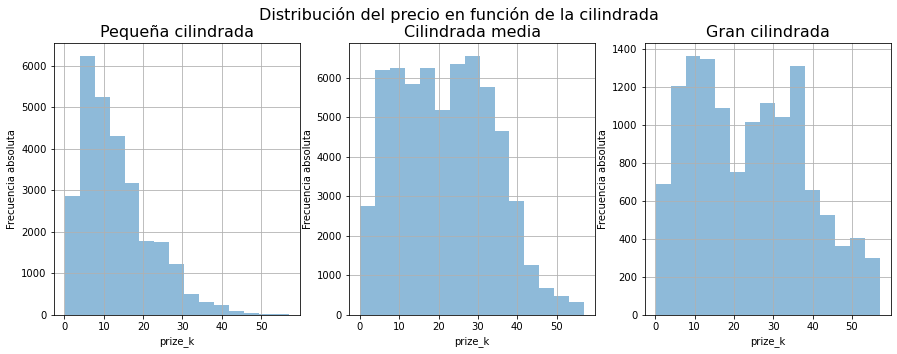

In [241]:
cc1 = datos[datos["cc"]<=4]
cc2 = datos[datos["cc"]>4]
cc2 = cc2[datos['cc']<8]
cc3 = datos[datos["cc"]>=8]

plt.figure(figsize=(15,5)).suptitle("Distribución del precio en función de la cilindrada",fontsize=16)

plt.subplot(1,3,1)
plt.title('Pequeña cilindrada',fontsize=16)
plt.hist(cc1['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')

plt.subplot(1,3,2)
plt.title('Cilindrada media',fontsize=16)
plt.hist(cc2['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')

plt.subplot(1,3,3)
plt.title('Gran cilindrada',fontsize=16)
plt.hist(cc3['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')

plt.show()

Aquí podemos observar que a cilindradas cada vez más altas, hay un mayor porcentaje de vehículos con un precio más alto. Esto corrobora nuestra intuición inicial, que a mayor cilindrada mayor precio del vehículo

### 4.5.2. Relación entre variables cualitativas

En esta sección se pretende analizar y comprobar las posibles relaciones existentes entrer pares de variables cualitativas, los cuales podamos pensar a priori  que puedan condicionarse entre sí. Esta búsqueda de relaciones tiene como objetivo comprender el comportamiento que puedan tener las variables cualitativas utilizándolas conjutamente en modelos de predicción para el precio deel vehículo. Por lo tanto, no se estudiará cada par de variables sin pensar en la utilidad final, sino que se elaborará una hipótesis inicial sobre la posible relación entre algunas de ellas, se realizará una comprobación en base a los datos diaposibles via tablas, gráficos y/o estadísticos que puedan sernos de ayuda y, finalmente, se corroborará o declinará la hipótesis incial. 

In [242]:
datos.columns

Index(['price_k', 'age', 'odometer_k', 'title_status', 'condition_num', 'cc',
       'type', 'fuel', 'transmission', 'drive', 'paint_color', 'state',
       'dim_region'],
      dtype='object')

### Tracción del coche en función del tipo de nucleo urbano
Ahora queremos comprobar si el hecho de estar en una gran ciudad condiciona el tipo de tracción del vehículo. Esta comprobación pretender comprobar si en núcleos más pequeños como pueblos o pequeñas ciudades se prefiere un coche de tracción completa que ayude a desempeñar trabajos y tareas en sectores más rurales, así como comprobar si los coches con tracción trasera (tracción predeterminada para los vehículos deportivos) suelen encontrarse en nucleos urbanos más grandes 

In [243]:
pd.crosstab(index=datos['drive'], columns=datos['dim_region'], margins=True)

dim_region,L,M / S,XL,All
drive,,,,
4wd,13210,38659,4287,56156
fwd,8650,18786,3687,31123
rwd,3934,9213,1975,15122
All,25794,66658,9949,102401


<AxesSubplot:xlabel='drive'>

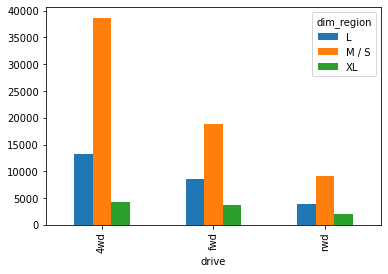

In [244]:
pd.crosstab(index=datos['drive'], columns=datos['dim_region'], margins=False).plot(kind='bar')

### Tipo de combustible en función del nucleo urbano

In [245]:
pd.crosstab(index=datos['fuel'], columns=datos['dim_region'], margins=True)

dim_region,L,M / S,XL,All
fuel,,,,
diesel,514,1523,205,2242
electric,63,123,46,232
gas,22549,58077,8709,89335
hybrid,702,1418,316,2436
other,1966,5517,673,8156
All,25794,66658,9949,102401


<AxesSubplot:xlabel='fuel'>

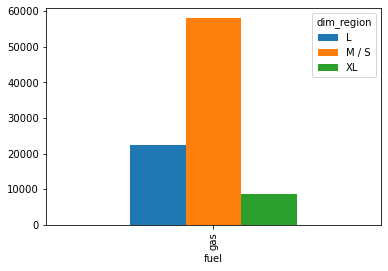

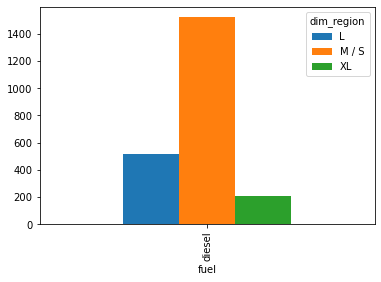

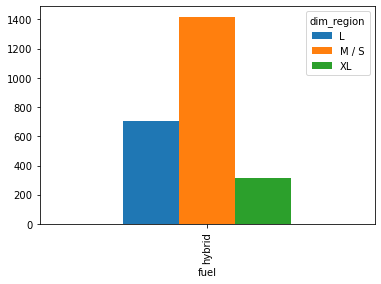

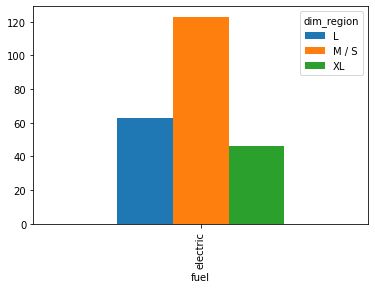

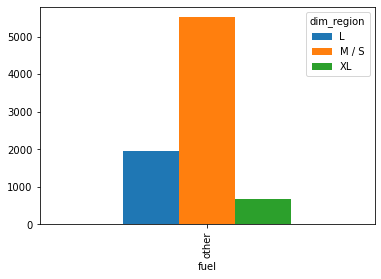

In [246]:

#pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]!='gas']['dim_region'], margins=False).plot(kind='bar')

pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]=='gas']['dim_region'], margins=False).plot(kind='bar')

pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]=='diesel']['dim_region'], margins=False).plot(kind='bar')

pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]=='hybrid']['dim_region'], margins=False).plot(kind='bar')

pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]=='electric']['dim_region'], margins=False).plot(kind='bar')

pd.crosstab(index=datos['fuel'], columns=datos[datos["fuel"]=='other']['dim_region'], margins=False).plot(kind='bar')

### Tipo de combustible según el tipo de coche

Si observamos la tabla, podemos observar que hay tipos de coches más propensos a montar un tipo de combustión alternativo a la gasolina o el diesel, como los `sedan`. 

In [247]:
pd.crosstab(index=datos['type'], columns=datos['fuel'], margins=True)

fuel,diesel,electric,gas,hybrid,other,All
type,,,,,,
SUV,417,95,28298,362,1414,30586
convertible,6,0,2130,35,101,2272
coupe,6,1,4165,30,552,4754
crossover,0,0,82,1,0,83
hatchback,91,64,3997,988,886,6026
micro,1,0,46,0,0,47
minivan,5,0,1486,2,3,1496
offroad,64,2,2237,6,102,2411
other,68,9,5031,225,1372,6705


### 4.5.3. Relación entre variables cuantitativas y cualitativas
En esta sección, como en la anterior, analizaremos pares de variables donde tengan sentido de ser analizadas de manera conjunta, intentando predecir apriori el comportamiento de las variables y contrastandola con la información obtenida. Nos centraremos especialmente en cómo condicionan las variables cualitativas a la variable objetivo 

In [248]:
datos.columns

Index(['price_k', 'age', 'odometer_k', 'title_status', 'condition_num', 'cc',
       'type', 'fuel', 'transmission', 'drive', 'paint_color', 'state',
       'dim_region'],
      dtype='object')

In [249]:
print(datos["title_status"].unique())
print(datos["transmission"].unique())
print(datos["drive"].unique())
print(datos["fuel"].unique())
print(datos["type"].unique())
print(datos["paint_color"].unique())
print(datos["dim_region"].unique())

['clean' 'clear' 'salvage' 'rebuilt' 'lien' 'missing']
['other' 'automatic' 'manual']
['4wd' 'fwd' 'rwd']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['pickup' 'truck' 'other' 'SUV' 'hatchback' 'minivan' 'coupe' 'sedan'
 'offroad' 'convertible' 'crossover' 'wagon' 'van' 'roadster' 'micro']
['red' 'black' 'grey' 'silver' 'custom' 'white' 'blue' 'yellow' 'unknown'
 'brown' 'green' 'orange' 'purple' 'pink']
['M / S' 'L' 'XL']


### Distribución de precio en función del estado oficial del vehículo

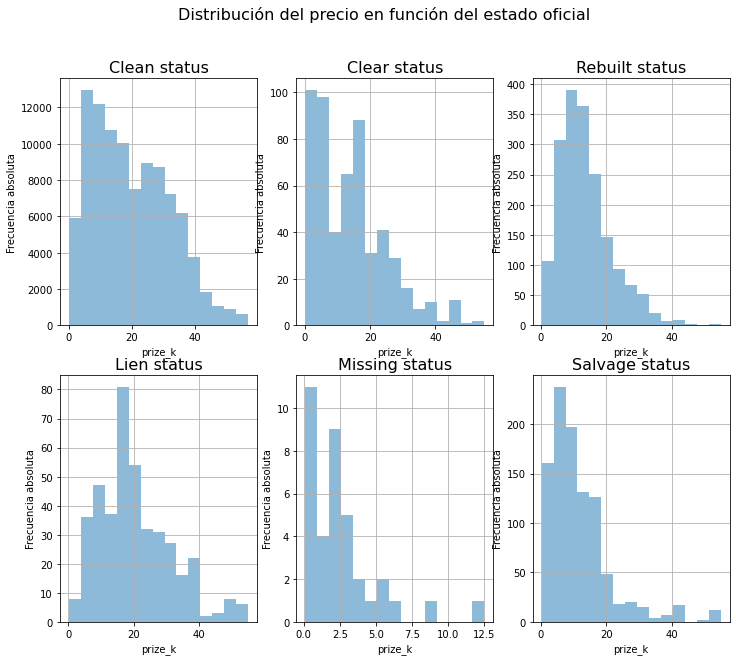

In [250]:
tit1    = datos[datos["title_status"]=="clean"]
tit2    = datos[datos["title_status"]=="clear"]
tit3    = datos[datos["title_status"]=="rebuilt"]
tit4    = datos[datos["title_status"]=="lien"]
tit5    = datos[datos["title_status"]=="missing"]
tit6    = datos[datos["title_status"]=="salvage"]

plt.figure(figsize=(12,10)).suptitle("Distribución del precio en función del estado oficial",fontsize=16)
plt.subplot(2,3,1)
plt.title('Clean status',fontsize=16)
plt.hist(tit1['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.subplot(2,3,2)
plt.title('Clear status',fontsize=16)
plt.hist(tit2['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.subplot(2,3,3)
plt.title('Rebuilt status',fontsize=16)
plt.hist(tit3['price_k'].values,bins=15,alpha=0.5,label="2")
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.subplot(2,3,4)
plt.title('Lien status',fontsize=16)
plt.hist(tit4['price_k'].values,bins=15,alpha=0.5)
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.subplot(2,3,5)
plt.title('Missing status',fontsize=16)
plt.hist(tit5['price_k'].values,bins=15,alpha=0.5)
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.subplot(2,3,6)
plt.title('Salvage status',fontsize=16)
plt.hist(tit6['price_k'].values,bins=15,alpha=0.5)
plt.ylabel ('Frecuencia absoluta')
plt.xlabel('prize_k')
plt.grid(which='major')
plt.show()

### Distribución precio en función del tipo de transmission

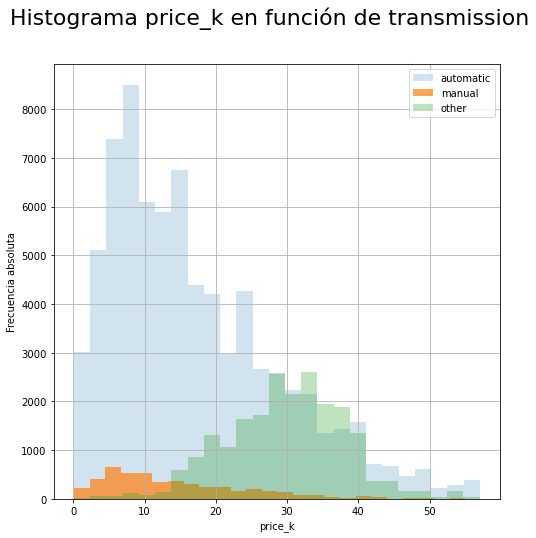

In [251]:
# Histogramas según especie
trans1    = datos[datos["transmission"]=='manual']
trans2    = datos[datos["transmission"]=='automatic']
trans3    = datos[datos["transmission"]=='other']

plt.figure(figsize=(8,8)).suptitle("Histograma price_k en función de transmission",fontsize=22)
plt.hist(trans2['price_k'].values,bins=25,alpha=0.2,label="automatic")
plt.hist(trans1['price_k'].values,bins=25,alpha=0.7,label="manual")
plt.hist(trans3['price_k'].values,bins=25,alpha=0.3,label="other")
plt.xlabel('price_k')
plt.ylabel('Frecuencia absoluta')
plt.legend()
plt.grid(which='major')
plt.show()

### Precio en función del tipo de tracción `drive`

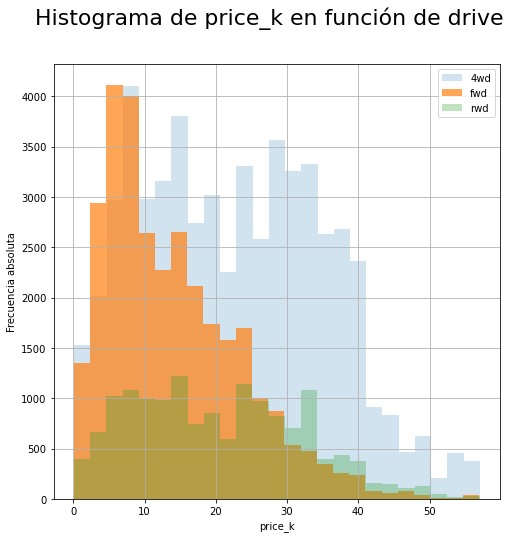

In [252]:
# Histogramas según especie
drive1    = datos[datos["drive"]=='4wd']
drive2    = datos[datos["drive"]=='fwd']
drive3    = datos[datos["drive"]=='rwd']

plt.figure(figsize=(8,8)).suptitle("Histograma de price_k en función de drive",fontsize=22)
plt.hist(drive1['price_k'].values,bins=25,alpha=0.2,label="4wd")
plt.hist(drive2['price_k'].values,bins=25,alpha=0.7,label="fwd")
plt.hist(drive3['price_k'].values,bins=25,alpha=0.3,label="rwd")
plt.xlabel('price_k')
plt.ylabel('Frecuencia absoluta')
plt.legend()
plt.grid(which='major')
plt.show()

No se aprecia una diferencia clara en el precio del vehículo en función del tipo de tracción

### Relacion entre precio y tipo de combustible

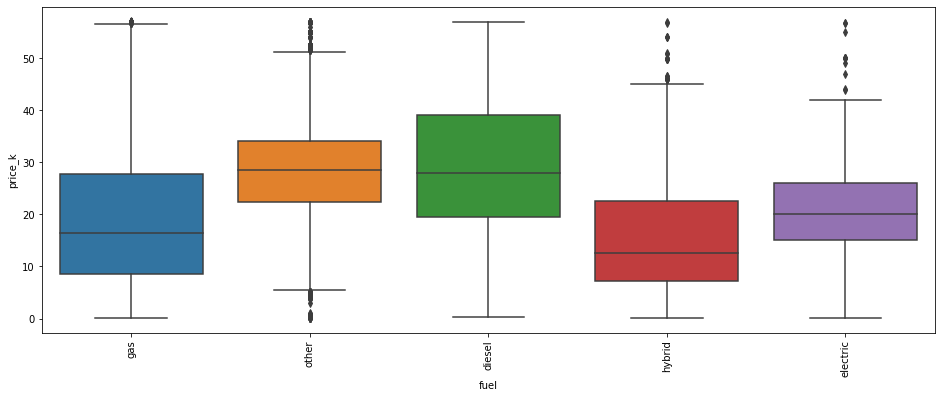

In [253]:
['gas' 'other' 'diesel' 'hybrid' 'electric']
fig = plt.figure(figsize=(16,6))
sns.boxplot(data=datos, x='fuel', y='price_k')
plt.xticks(rotation=90)
plt.show()

### Precio en función del estado

In [254]:
datos.groupby("state")['price_k'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ak,852.0,24.428950,10.682127,0.450,15.99500,24.9880,31.1940,56.995
al,1178.0,22.611076,11.775858,1.000,11.98925,23.9900,31.5900,56.990
ar,691.0,25.488692,13.766191,0.300,13.49500,24.9880,36.4550,56.954
az,2149.0,21.424538,12.355922,0.189,10.99500,19.9900,30.5900,56.997
ca,12959.0,18.955321,11.864848,0.101,8.99900,16.9900,26.9990,56.999
co,3028.0,19.189968,11.840187,0.800,8.99875,17.7230,26.9990,56.990
ct,1486.0,16.088974,11.626262,0.199,6.99800,11.9000,24.5000,57.000
dc,953.0,17.232729,10.638320,0.500,7.90000,15.5000,25.0000,55.999
de,157.0,17.401051,12.412637,0.299,6.39500,13.8990,27.5900,43.590


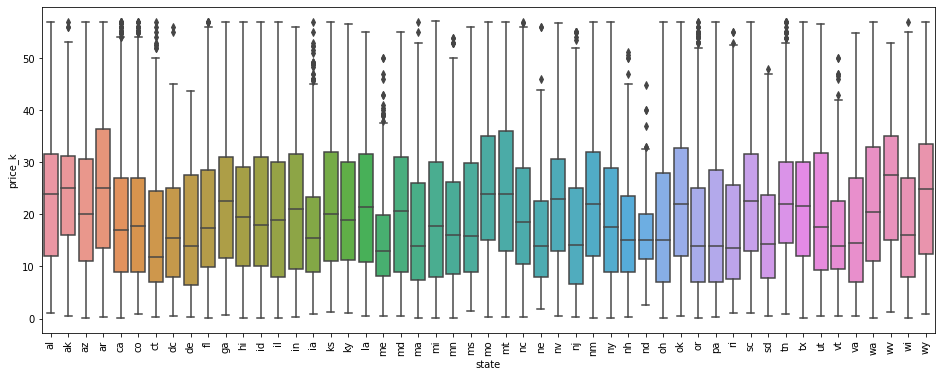

In [255]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(data=datos, x='state', y='price_k')
plt.xticks(rotation=90)
plt.show()

Se pueden apreciar diferencias claras del precio en función del estado, véase Nevada (nv) y Connecticut (ct) como ejemplos. Estas diferencias pueden deberse al nivel adquisitivo de cada uno de los estados.

### Precio en función del tipo de coche

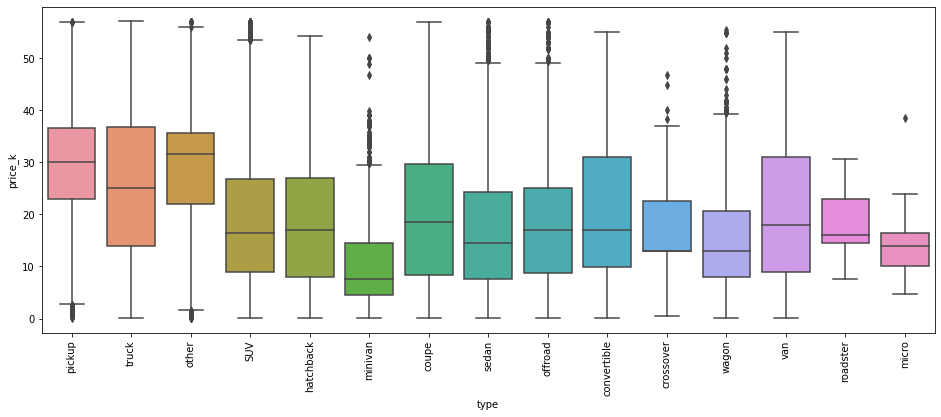

In [256]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(data=datos, x='type', y='price_k')
plt.xticks(rotation=90)
plt.show()

En esta última gráfica podemos observar como el precio del vehículo está altamente influenciado por su tipo, por lo que es una variable a tener en cuenta de cara a la construcción de modelos.

## 4.6 dataset final

In [257]:
datos.shape

(102401, 13)

In [258]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102401 entries, 0 to 102400
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price_k        102401 non-null  float64
 1   age            102401 non-null  int64  
 2   odometer_k     102401 non-null  float64
 3   title_status   102401 non-null  object 
 4   condition_num  102401 non-null  int64  
 5   cc             102401 non-null  int64  
 6   type           102401 non-null  object 
 7   fuel           102401 non-null  object 
 8   transmission   102401 non-null  object 
 9   drive          102401 non-null  object 
 10  paint_color    102401 non-null  object 
 11  state          102401 non-null  object 
 12  dim_region     102401 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 10.2+ MB


In [259]:
datos.to_csv("vehiclesMOD_2.csv", index = False, header=True)